In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def parse_and_draw_bipartite_custom(Graph):
    Graph_E = nx.edges(Graph).data()
    Graph_X = {n for n, d in Graph.nodes(data=True) if d["bipartite"] == 0}
    Graph_Y = set(Graph) - Graph_X

    NODE_SIZE = 5
    NODE_COLOR = ['red'] * len(Graph_X) + ['blue'] * len(Graph_Y)
    EDGE_ALPHA = list(zip([0]*len(Graph_E),[0]*len(Graph_E),[0]*len(Graph_E),[x['weight']/100 for _,_,x in Graph_E]))

    pos = {}
    pos.update((n, (NODE_SIZE*1, i*len(Graph_Y)/len(Graph_X)*NODE_SIZE)) for i, n in enumerate(Graph_X)) # put nodes from X at x=1
    pos.update((n, (NODE_SIZE*2, i*NODE_SIZE)) for i, n in enumerate(Graph_Y)) # put nodes from Y at x=2

    nx.draw_networkx(Graph, pos=pos, with_labels=False, node_size=NODE_SIZE, node_color=NODE_COLOR, edge_color=EDGE_ALPHA)
    plt.show()
    return Graph_X, Graph_Y

def draw_unipartite_custom(Graph, node_color):
    Graph_E = nx.edges(Graph).data()
    Graph_X = Graph.nodes()

    NODE_SIZE = 5
    NODE_COLOR = [node_color] * len(Graph_X)

    nx.draw_spring(Graph, with_labels=False, node_size=NODE_SIZE, node_color=NODE_COLOR)
    plt.show()

In [2]:
df = pd.read_csv('sp21_student_kaggle.csv')

In [3]:
B = nx.Graph()
B.add_nodes_from(df.Name,   bipartite=0)
B.add_nodes_from(df.Kaggle, bipartite=1)
B.add_edges_from([(row.Name, row.Kaggle, {'weight': row.Weight}) for _, row in df.iterrows()])

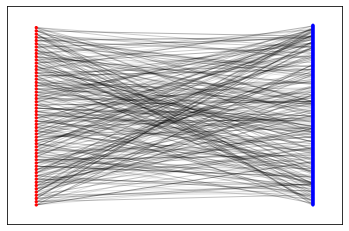

In [4]:
B_X, B_Y = parse_and_draw_bipartite_custom(B)

In [5]:
print('This network has %d components' % (nx.number_connected_components(B)))

This network has 14 components


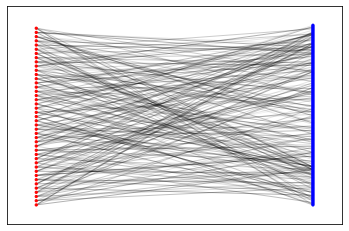

Persons who are missing in the largest component:
   Kim, Chongmin
   Sluimer, Jasper
   Bansal, Parth
   Shin, Yoon Jae
   Kim, Junmo
   Kim, Hyunwoo
   Kim, Jaehee
   Koller, Pia
   Buisson, Antoine
   Ham, Yoonhee
   Doret, Norman
   Oh, Sewon
   Na, Doori


In [6]:
Cs = nx.connected_components(B)
C_main = max(Cs, key=len)
S = B.subgraph(C_main)

S_X, S_Y = parse_and_draw_bipartite_custom(S)

R_X = B_X - S_X
print('Persons who are missing in the largest component:')
for r in R_X:
    print('  ',r)

Projected main component to "dataset"


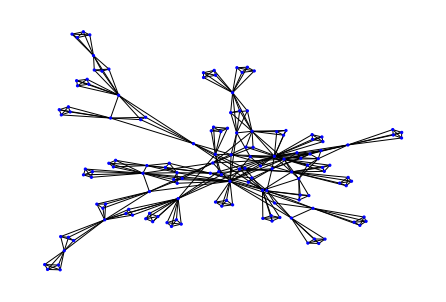

In [7]:
uS_dataset = nx.projected_graph(S, S_Y)
print('Projected main component to "dataset"')
draw_unipartite_custom(uS_dataset, 'blue')

Projected main component to "person"


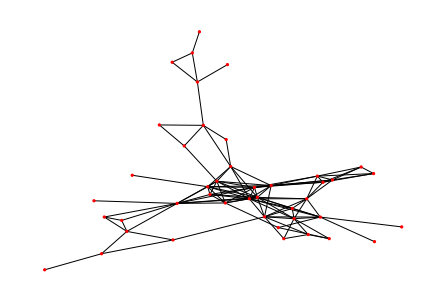

Person                        Clossness     Betweenness
Shetty, Marguerite Indrayani    0.442          0.099
Lee, Seungju                    0.424          0.201
Lee, Jewoo                      0.296          0.003
Kim, Jongwon                    0.276          0.000
Lee, Inhoe                      0.400          0.067
Park, Jung Ho                   0.368          0.030
Logghe, Jubeline Jacqueline L   0.326          0.055
Stepanov, Ilya                  0.300          0.000
Nguyen, Tuan Nghia              0.302          0.000
Seok, Ji Heon                   0.269          0.048
Lim, Chan Song                  0.333          0.230
Kim, Tae Kyoung                 0.438          0.069
Chai, Kyuwook                   0.176          0.000
Lee, Jueon                      0.212          0.000
Xu, Shu                         0.288          0.000
Brandl, Florian Lukas           0.347          0.044
Chang, Jaewon                   0.210          0.000
Kang, Dong Sig                  0.323      

In [8]:
uS_person = nx.projected_graph(S, S_X)
print('Projected main component to "person"')
draw_unipartite_custom(uS_person, 'red')

closeness = nx.closeness_centrality(uS_person)
betweenness = nx.betweenness_centrality(uS_person)

print('%-*s%-*s     %s' % (30,'Person',9,'Clossness', 'Betweenness'))
for p in closeness:
    print('%-*s%.3f%-*s%.3f' % (32, p, closeness[p],10,'',betweenness[p]))

corrcoef = np.corrcoef([closeness[p] for p in closeness], [betweenness[p] for p in betweenness])

print('\nCorrelation coefficient:\n', corrcoef)